EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import scipy.stats as scp

In [2]:
data = pd.read_csv('../Capstone/clean_data.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,1,140,289,0,Normal,172,0,0.0,0,0
1,49,F,2,160,180,0,Normal,156,0,1.0,1,1
2,37,M,1,130,283,0,ST,98,0,0.0,0,0
3,48,F,3,138,214,0,Normal,108,1,1.5,1,1
4,54,M,2,150,195,0,Normal,122,0,0.0,0,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,1,140,289,0,Normal,172,0,0.0,0,0
1,49,F,2,160,180,0,Normal,156,0,1.0,1,1
2,37,M,1,130,283,0,ST,98,0,0.0,0,0
3,48,F,3,138,214,0,Normal,108,1,1.5,1,1
4,54,M,2,150,195,0,Normal,122,0,0.0,0,0


In [4]:
data.describe()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,2.251634,132.396514,198.799564,0.233115,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.931031,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,2.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,3.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,3.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,3.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,2.000000,1.000000


,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,2.251634,132.396514,198.799564,0.233115,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.931031,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,2.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,3.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,3.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,3.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [5]:
data.dtypes

Age                 int64
Sex                object
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

Age                 int64
Sex                object
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

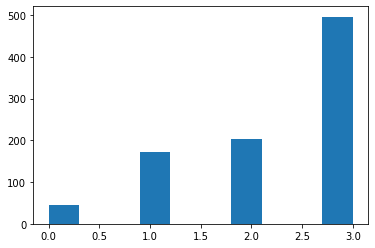

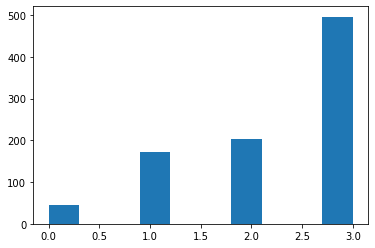

In [6]:
plt.hist(data['ChestPainType'])
plt.show()

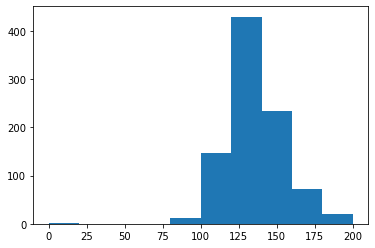

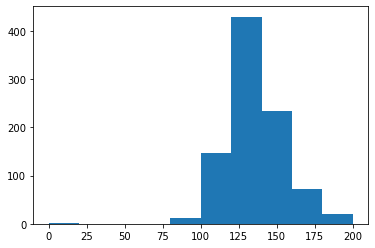

In [7]:
plt.hist(data['RestingBP'])
plt.show()

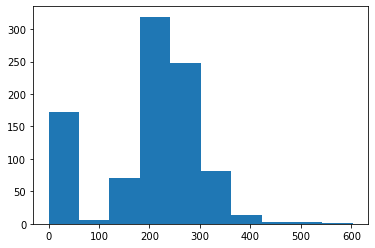

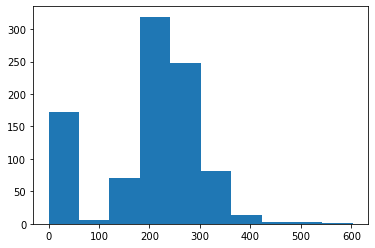

In [8]:
plt.hist(data['Cholesterol'])
plt.show()

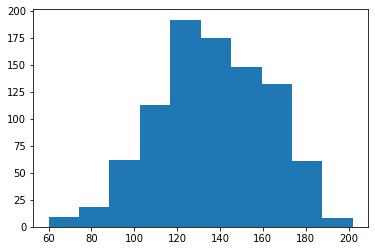

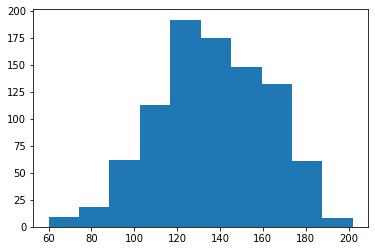

In [9]:
plt.hist(data['MaxHR'])
plt.show()

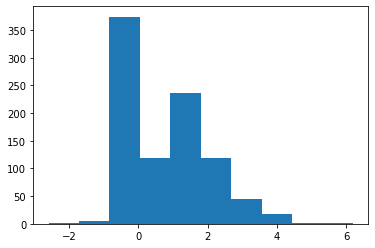

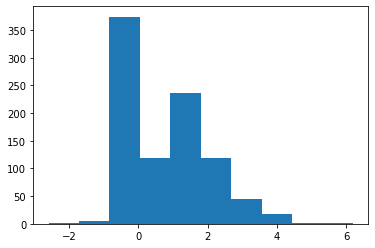

In [10]:
plt.hist(data['Oldpeak'])
plt.show()

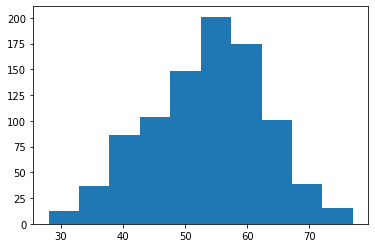

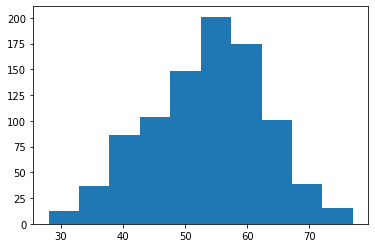

In [11]:
plt.hist(data['Age'])
plt.show()

In [12]:
data.corr()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.165896,0.254399,-0.095282,0.198039,-0.382045,0.215793,0.258612,0.268264,0.282039
ChestPainType,0.165896,1.000000,0.022168,-0.136139,0.116703,-0.343654,0.416625,0.245027,0.317480,0.471354
RestingBP,0.254399,0.022168,1.000000,0.100893,0.070193,-0.112135,0.155101,0.164803,0.075162,0.107589
Cholesterol,-0.095282,-0.136139,0.100893,1.000000,-0.260974,0.235792,-0.034166,0.050148,-0.111471,-0.232741
FastingBS,0.198039,0.116703,0.070193,-0.260974,1.000000,-0.131438,0.060451,0.052698,0.175774,0.267291
MaxHR,-0.382045,-0.343654,-0.112135,0.235792,-0.131438,1.000000,-0.370425,-0.160691,-0.343419,-0.400421
ExerciseAngina,0.215793,0.416625,0.155101,-0.034166,0.060451,-0.370425,1.000000,0.408752,0.428706,0.494282
Oldpeak,0.258612,0.245027,0.164803,0.050148,0.052698,-0.160691,0.408752,1.000000,0.501921,0.403951
ST_Slope,0.268264,0.317480,0.075162,-0.111471,0.175774,-0.343419,0.428706,0.501921,1.000000,0.558771
HeartDisease,0.282039,0.471354,0.107589,-0.232741,0.267291,-0.400421,0.494282,0.403951,0.558771,1.000000


,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.165896,0.254399,-0.095282,0.198039,-0.382045,0.215793,0.258612,0.268264,0.282039
ChestPainType,0.165896,1.000000,0.022168,-0.136139,0.116703,-0.343654,0.416625,0.245027,0.317480,0.471354
RestingBP,0.254399,0.022168,1.000000,0.100893,0.070193,-0.112135,0.155101,0.164803,0.075162,0.107589
Cholesterol,-0.095282,-0.136139,0.100893,1.000000,-0.260974,0.235792,-0.034166,0.050148,-0.111471,-0.232741
FastingBS,0.198039,0.116703,0.070193,-0.260974,1.000000,-0.131438,0.060451,0.052698,0.175774,0.267291
MaxHR,-0.382045,-0.343654,-0.112135,0.235792,-0.131438,1.000000,-0.370425,-0.160691,-0.343419,-0.400421
ExerciseAngina,0.215793,0.416625,0.155101,-0.034166,0.060451,-0.370425,1.000000,0.408752,0.428706,0.494282
Oldpeak,0.258612,0.245027,0.164803,0.050148,0.052698,-0.160691,0.408752,1.000000,0.501921,0.403951
ST_Slope,0.268264,0.317480,0.075162,-0.111471,0.175774,-0.343419,0.428706,0.501921,1.000000,0.558771
HeartDisease,0.282039,0.471354,0.107589,-0.232741,0.267291,-0.400421,0.494282,0.403951,0.558771,1.000000


<AxesSubplot:>

<AxesSubplot:>

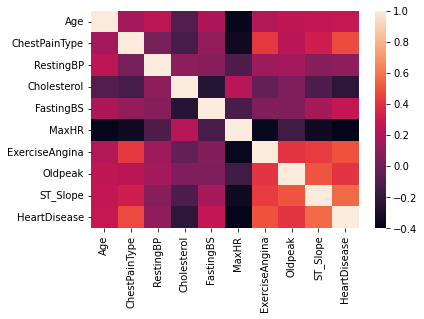

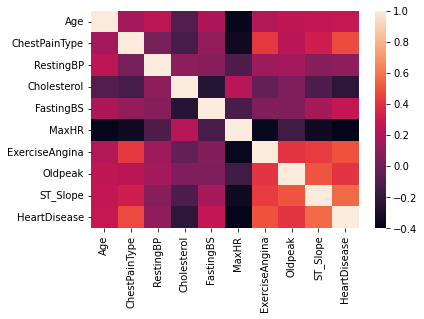

In [13]:
sns.heatmap(data.corr())

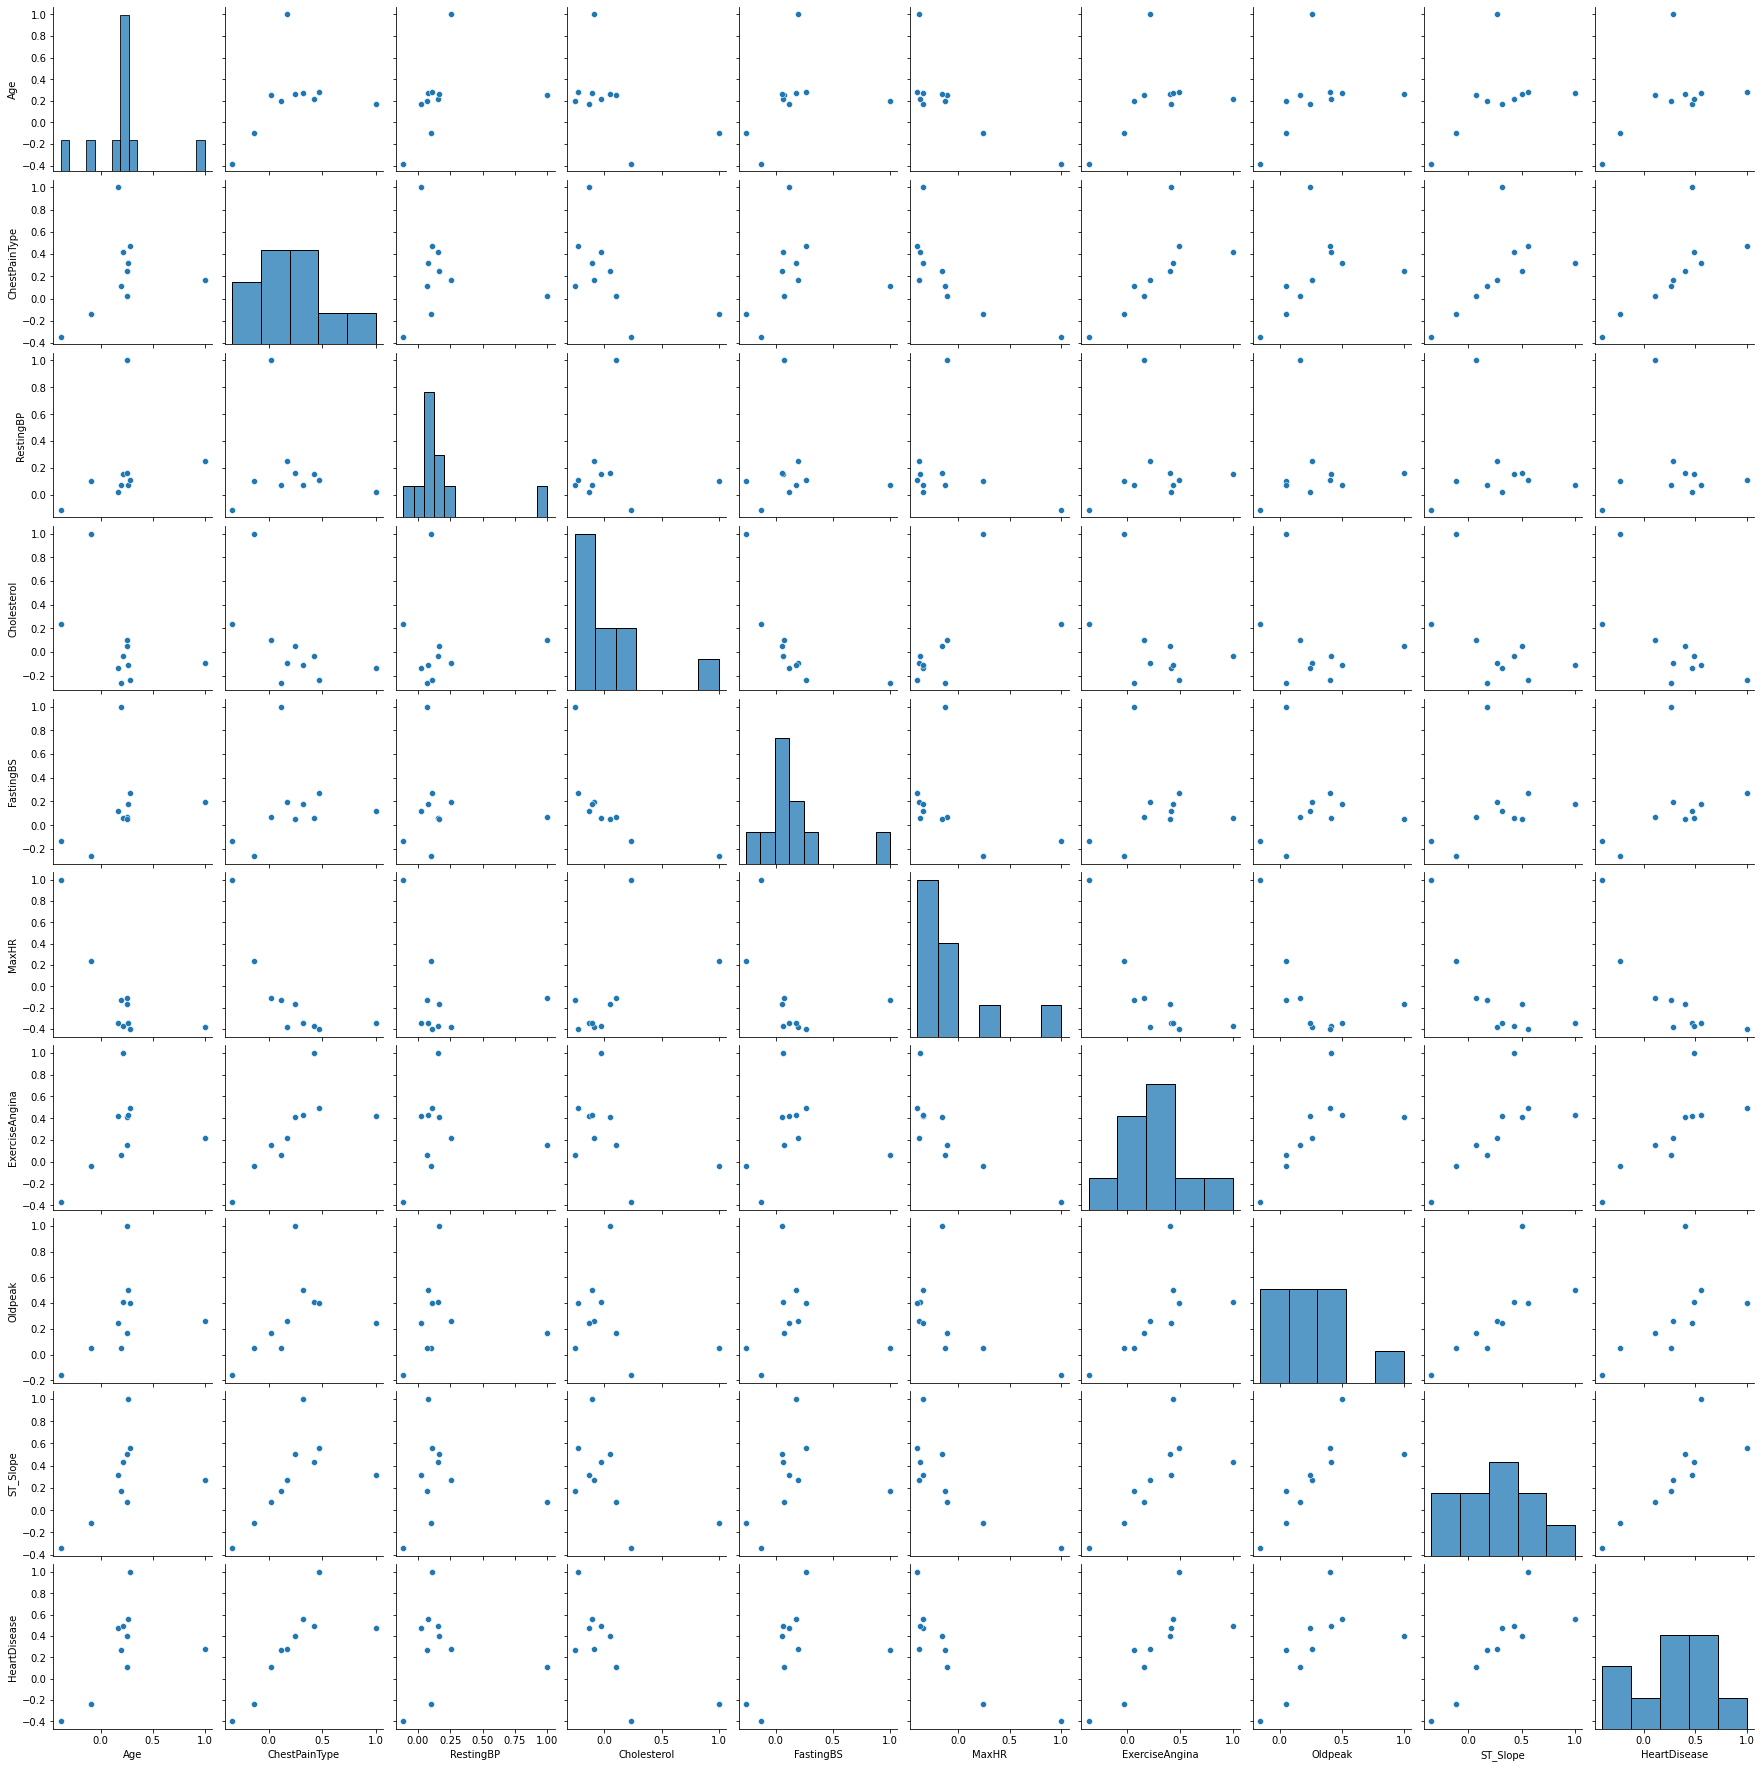

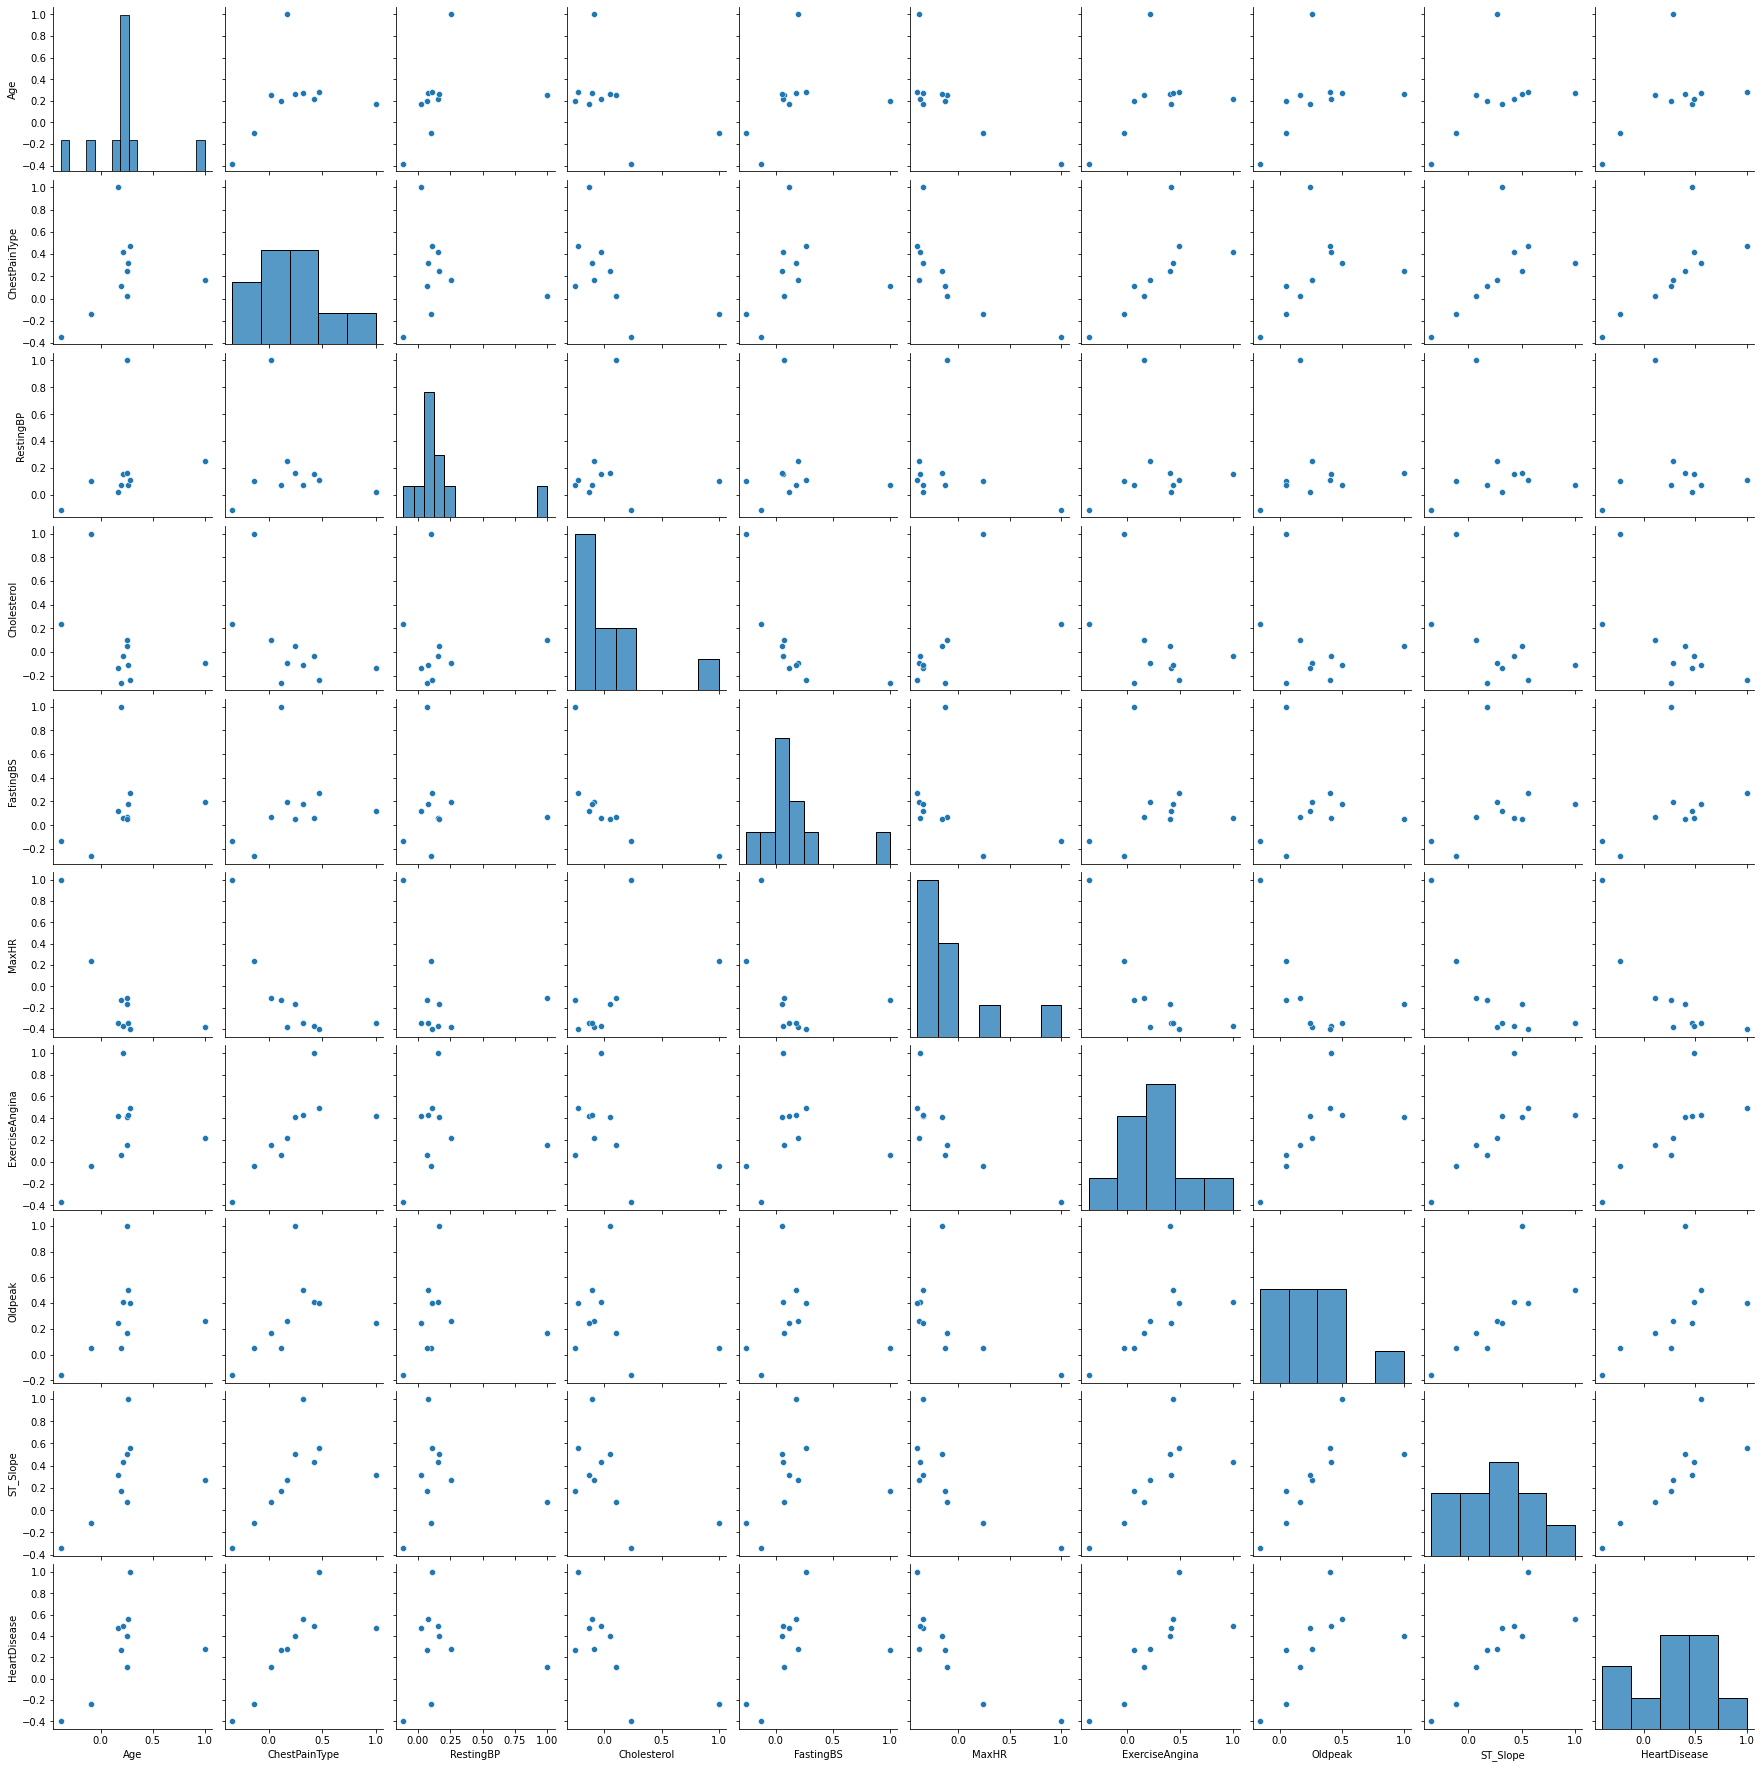

In [14]:
sns.pairplot(data.corr())

In [15]:
# strongest correlation so far appears to be st_slope to heartdisease at 0.56

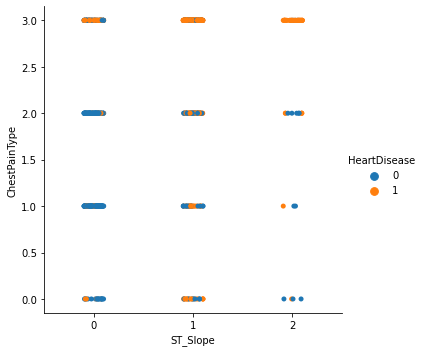

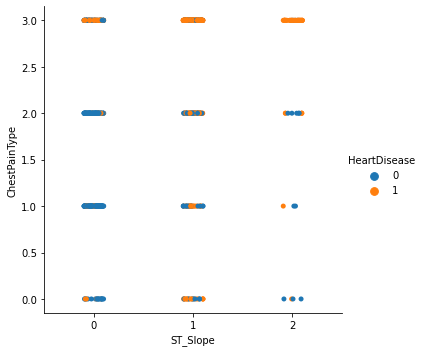

In [16]:
sns.catplot(x='ST_Slope', y='ChestPainType', hue='HeartDisease', data=data)

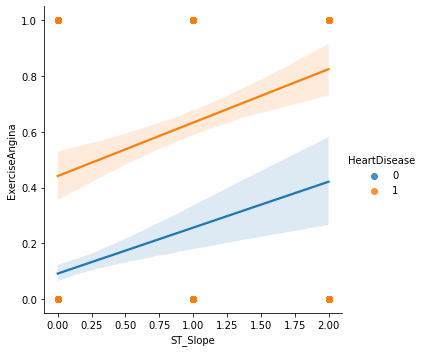

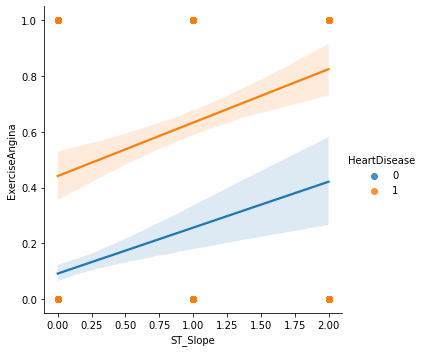

In [17]:
sns.lmplot(x='ST_Slope', y='ExerciseAngina', hue='HeartDisease', data=data)

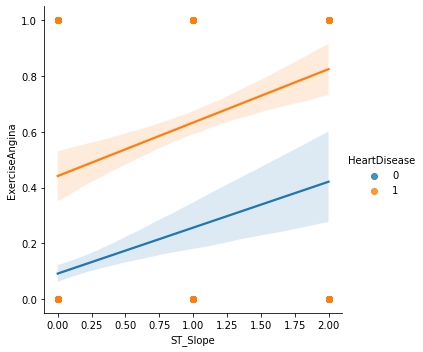

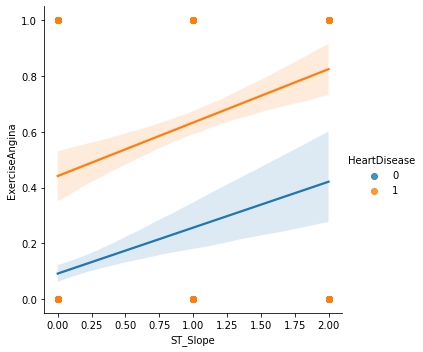

In [18]:
sns.lmplot(x='ST_Slope', y='ExerciseAngina', hue='HeartDisease', data=data)

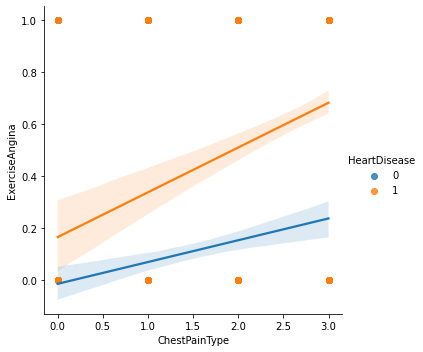

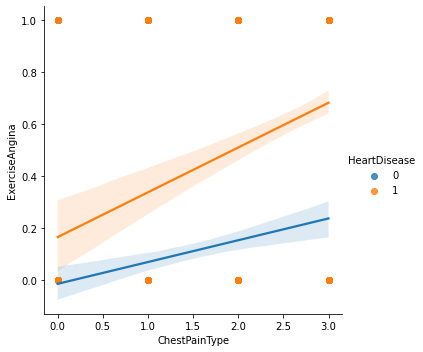

In [19]:
sns.lmplot(x='ChestPainType', y='ExerciseAngina', hue='HeartDisease', data=data)

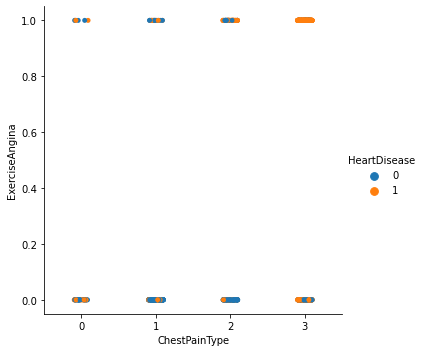

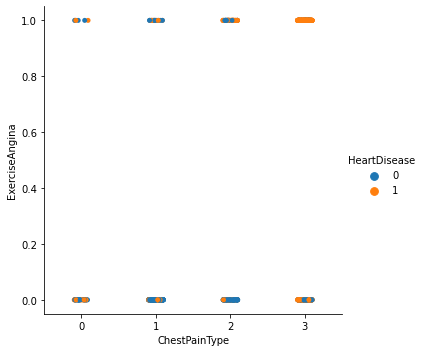

In [20]:
sns.catplot(x='ChestPainType', y='ExerciseAngina', hue='HeartDisease', data=data)

In [21]:
# The biggest factors at the moment appear to be ChestPainType, ST_Slope, ExerciseAngina

In [22]:
# drop zeros from cholesterol and maxhr and retest

nozerodata = data.loc[~(data[['Cholesterol']]==0).all(axis=1)]

In [23]:
nozerodata.Cholesterol.unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181, 236, 203, 153, 316, 311, 252, 458,
       384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 123, 17

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181, 236, 203, 153, 316, 311, 252, 458,
       384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 123, 17

In [24]:
nozerodata.min()

Age                28
Sex                 F
ChestPainType       0
RestingBP          92
Cholesterol        85
FastingBS           0
RestingECG        LVH
MaxHR              69
ExerciseAngina      0
Oldpeak          -0.1
ST_Slope            0
HeartDisease        0
dtype: object

Age                28
Sex                 F
ChestPainType       0
RestingBP          92
Cholesterol        85
FastingBS           0
RestingECG        LVH
MaxHR              69
ExerciseAngina      0
Oldpeak          -0.1
ST_Slope            0
HeartDisease        0
dtype: object

In [25]:
nozerodata.corr()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.173717,0.259865,0.058758,0.241338,-0.382112,0.245908,0.286006,0.285421,0.298617
ChestPainType,0.173717,1.000000,0.043508,0.079884,0.043448,-0.344047,0.447470,0.292942,0.338367,0.463177
RestingBP,0.259865,0.043508,1.000000,0.095939,0.173765,-0.125774,0.161035,0.198575,0.143881,0.173242
Cholesterol,0.058758,0.079884,0.095939,1.000000,0.054012,-0.019856,0.086768,0.058488,0.078516,0.103866
FastingBS,0.241338,0.043448,0.173765,0.054012,1.000000,-0.102710,0.109995,0.055568,0.157780,0.160594
MaxHR,-0.382112,-0.344047,-0.125774,-0.019856,-0.102710,1.000000,-0.396289,-0.259533,-0.349926,-0.377212
ExerciseAngina,0.245908,0.447470,0.161035,0.086768,0.109995,-0.396289,1.000000,0.465491,0.473543,0.551834
Oldpeak,0.286006,0.292942,0.198575,0.058488,0.055568,-0.259533,0.465491,1.000000,0.613961,0.495696
ST_Slope,0.285421,0.338367,0.143881,0.078516,0.157780,-0.349926,0.473543,0.613961,1.000000,0.597334
HeartDisease,0.298617,0.463177,0.173242,0.103866,0.160594,-0.377212,0.551834,0.495696,0.597334,1.000000


,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.173717,0.259865,0.058758,0.241338,-0.382112,0.245908,0.286006,0.285421,0.298617
ChestPainType,0.173717,1.000000,0.043508,0.079884,0.043448,-0.344047,0.447470,0.292942,0.338367,0.463177
RestingBP,0.259865,0.043508,1.000000,0.095939,0.173765,-0.125774,0.161035,0.198575,0.143881,0.173242
Cholesterol,0.058758,0.079884,0.095939,1.000000,0.054012,-0.019856,0.086768,0.058488,0.078516,0.103866
FastingBS,0.241338,0.043448,0.173765,0.054012,1.000000,-0.102710,0.109995,0.055568,0.157780,0.160594
MaxHR,-0.382112,-0.344047,-0.125774,-0.019856,-0.102710,1.000000,-0.396289,-0.259533,-0.349926,-0.377212
ExerciseAngina,0.245908,0.447470,0.161035,0.086768,0.109995,-0.396289,1.000000,0.465491,0.473543,0.551834
Oldpeak,0.286006,0.292942,0.198575,0.058488,0.055568,-0.259533,0.465491,1.000000,0.613961,0.495696
ST_Slope,0.285421,0.338367,0.143881,0.078516,0.157780,-0.349926,0.473543,0.613961,1.000000,0.597334
HeartDisease,0.298617,0.463177,0.173242,0.103866,0.160594,-0.377212,0.551834,0.495696,0.597334,1.000000


<AxesSubplot:>

<AxesSubplot:>

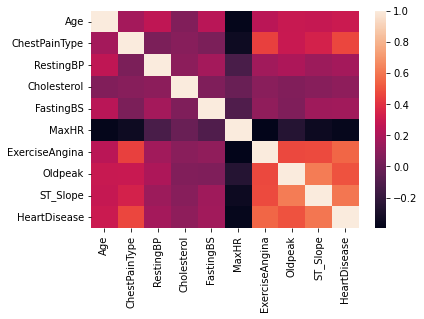

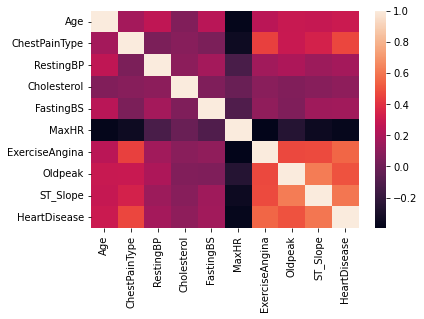

In [26]:
sns.heatmap(nozerodata.corr())

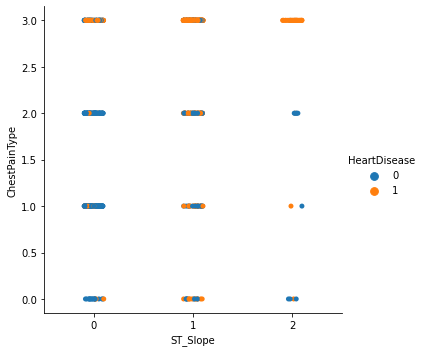

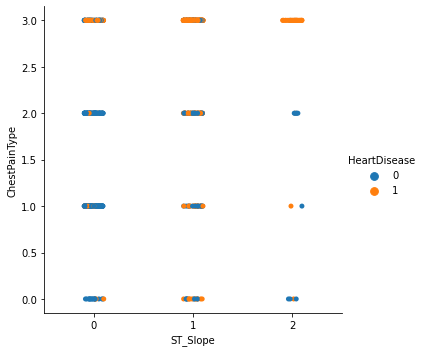

In [27]:
sns.catplot(x='ST_Slope', y='ChestPainType', hue='HeartDisease', data=nozerodata)

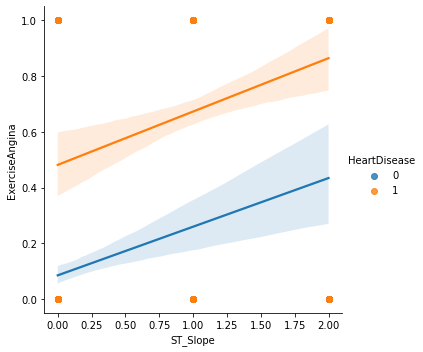

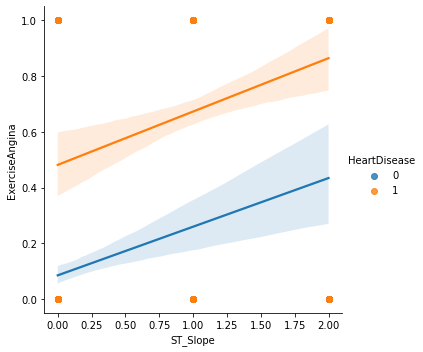

In [28]:
sns.lmplot(x='ST_Slope', y='ExerciseAngina', hue='HeartDisease', data=nozerodata)

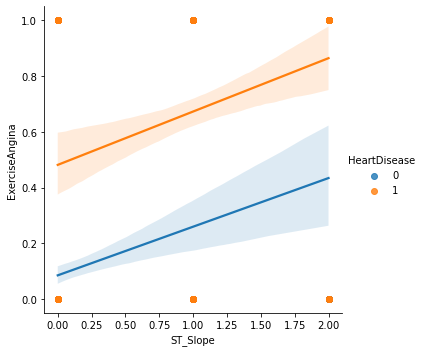

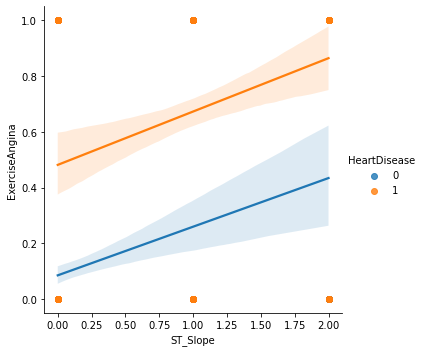

In [29]:
sns.lmplot(x='ST_Slope', y='ExerciseAngina', hue='HeartDisease', data=nozerodata)

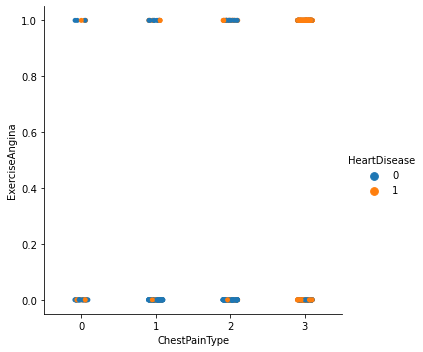

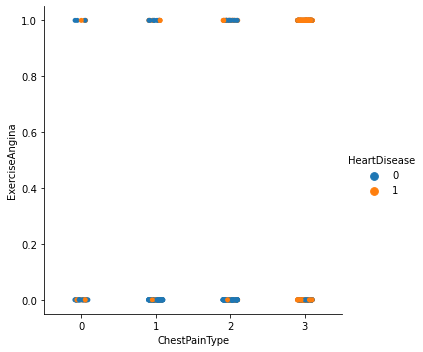

In [30]:
sns.catplot(x='ChestPainType', y='ExerciseAngina', hue='HeartDisease', data=nozerodata)

In [31]:
# still the same categories showing as most significant, ST_Slope, ExerciseAngina, ChestPainType

In [53]:
nozerodata.HeartDisease = nozerodata.HeartDisease.replace(0, 'No')
nozerodata.HeartDisease = nozerodata.HeartDisease.replace('yes', 'Yes')

nozerodata.ChestPainType = nozerodata.ChestPainType.replace(0, 'TA')
nozerodata.ChestPainType = nozerodata.ChestPainType.replace(1, 'ATA')
nozerodata.ChestPainType = nozerodata.ChestPainType.replace(2, 'NAP')
nozerodata.ChestPainType = nozerodata.ChestPainType.replace(3, 'ASY')

nozerodata.ExerciseAngina = nozerodata.ExerciseAngina.replace(0, 'No')
nozerodata.ExerciseAngina = nozerodata.ExerciseAngina.replace(1, 'Yes')

nozerodata.ST_Slope = nozerodata.ST_Slope.replace(0, 'Up')
nozerodata.ST_Slope = nozerodata.ST_Slope.replace(1, 'Flat')
nozerodata.ST_Slope = nozerodata.ST_Slope.replace(2, 'Down')

In [54]:
nozerodata.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,No,0.0,Up,No
1,49,F,NAP,160,180,0,Normal,156,No,1.0,Flat,Yes
2,37,M,ATA,130,283,0,ST,98,No,0.0,Up,No
3,48,F,ASY,138,214,0,Normal,108,Yes,1.5,Flat,Yes
4,54,M,NAP,150,195,0,Normal,122,No,0.0,Up,No


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,No,0.0,Up,No
1,49,F,NAP,160,180,0,Normal,156,No,1.0,Flat,Yes
2,37,M,ATA,130,283,0,ST,98,No,0.0,Up,No
3,48,F,ASY,138,214,0,Normal,108,Yes,1.5,Flat,Yes
4,54,M,NAP,150,195,0,Normal,122,No,0.0,Up,No


# Below will be the Chi Statistic Tests

 Here I will look if there is a relationship between Sex and Heart Disease

In [55]:
data_sex = pd.crosstab(nozerodata['Sex'], nozerodata['HeartDisease'])

In [56]:
print(data_sex)

HeartDisease   No  Yes
Sex                   
F             142   40
M             248  316
HeartDisease   No  Yes
Sex                   
F             142   40
M             248  316


In [58]:
observed_val_sex = data_sex.values
print(observed_val_sex)

[[142  40]
 [248 316]]
[[142  40]
 [248 316]]


In [65]:
import scipy.stats as stats
from scipy.stats import chi2

In [66]:
sex_val = stats.chi2_contingency(data_sex)
sex_val

(62.58908315427757,
 2.5466116402861134e-15,
 1,
 array([[ 95.14745308,  86.85254692],
        [294.85254692, 269.14745308]]))

(62.58908315427757,
 2.5466116402861134e-15,
 1,
 array([[ 95.14745308,  86.85254692],
        [294.85254692, 269.14745308]]))

In [67]:
expected_sexvals=sex_val[3]

In [68]:
no_rows=len(data_sex.iloc[0:2,0])
no_columns=len(data_sex.iloc[0,0:2])
ddof=(no_rows-1)*(no_columns-1)
print('Degree of Freedom:', ddof)
alpha=0.05

Degree of Freedom: 1
Degree of Freedom: 1


In [69]:
chi_square=sum([(o-e)**2./e for o,e in zip(observed_val_sex, expected_sexvals)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [70]:
print(chi_square_statistic)

63.94664942054928
63.94664942054928


In [71]:
crit_val=chi2.ppf(q=1-alpha, df=ddof)
print(crit_val)

3.841458820694124
3.841458820694124


In [72]:
p_value=1-chi2.cdf(x=chi_square_statistic, df=ddof)
print('p-val: ', p_value)
print('Significance level: ', alpha)
print('Degree of Freedom: ', ddof)
print('p-val: ', p_value)

p-val:  1.3322676295501878e-15
Significance level:  0.05
Degree of Freedom:  1
p-val:  1.3322676295501878e-15
p-val:  1.3322676295501878e-15
Significance level:  0.05
Degree of Freedom:  1
p-val:  1.3322676295501878e-15


In [75]:
if chi_square_statistic>=crit_val:
    print('Reject H0, there is a relationship between 2 cat variables')
else: 
    print('Retain H0, there is no relationship between 2 cat variables')
          
if p_value<=alpha:
    print('Reject H0, there is a relationship between 2 cat variables')
else: 
    print('Retain H0, there is no relationship between 2 cat variables')

Reject H0, there is a relationship between 2 cat variables
Reject H0, there is a relationship between 2 cat variables
Reject H0, there is a relationship between 2 cat variables
Reject H0, there is a relationship between 2 cat variables


 Here I will look if there is a relationship between ChestPainType (CPT) and Heart Disease
 
 

In [86]:
data_cpt = pd.crosstab(nozerodata['ChestPainType'], nozerodata['HeartDisease'])

In [87]:
print(data_cpt)

HeartDisease    No  Yes
ChestPainType          
ASY             96  274
ATA            145   21
NAP            123   46
TA              26   15
HeartDisease    No  Yes
ChestPainType          
ASY             96  274
ATA            145   21
NAP            123   46
TA              26   15


In [88]:
observed_cptval = data_cpt.values
print(observed_cptval)

[[ 96 274]
 [145  21]
 [123  46]
 [ 26  15]]
[[ 96 274]
 [145  21]
 [123  46]
 [ 26  15]]


In [89]:
cpt_val = stats.chi2_contingency(data_cpt)
cpt_val

(215.19039576001535,
 2.199657628673997e-46,
 3,
 array([[193.43163539, 176.56836461],
        [ 86.78284182,  79.21715818],
        [ 88.35120643,  80.64879357],
        [ 21.43431635,  19.56568365]]))

(215.19039576001535,
 2.199657628673997e-46,
 3,
 array([[193.43163539, 176.56836461],
        [ 86.78284182,  79.21715818],
        [ 88.35120643,  80.64879357],
        [ 21.43431635,  19.56568365]]))

In [90]:
expected_cptvals=cpt_val[3]

In [129]:
no_rows=len(data_cpt.iloc[0:4,0])
no_columns=len(data_cpt.iloc[0,0:2])
ddof=(no_rows-1)*(no_columns-1)
print('Degree of Freedom:', ddof)
alpha=0.05

Degree of Freedom: 2
Degree of Freedom: 2


In [130]:
chi_square=sum([(o-e)**2./e for o,e in zip(observed_cptval, expected_cptvals)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [131]:
print(chi_square_statistic)

215.19039576001538
215.19039576001538


In [132]:
crit_val=chi2.ppf(q=1-alpha, df=ddof)
print(crit_val)

5.991464547107979
5.991464547107979


In [133]:
p_value = 1-chi2.cdf(x=chi_square_statistic, df=ddof)
print('p-val: ', p_value)
print('Significance level: ', alpha)
print('Degree of Freedom: ', ddof)
print('p-val: ', p_value)

p-val:  0.0
Significance level:  0.05
Degree of Freedom:  2
p-val:  0.0
p-val:  0.0
Significance level:  0.05
Degree of Freedom:  2
p-val:  0.0


In [134]:
if chi_square_statistic>=crit_val:
    print('Reject H0, there is a relationship between 2 cat variables')
else: 
    print('Retain H0, there is no relationship between 2 cat variables')
          
if p_value<=alpha:
    print('Reject H0, there is a relationship between 2 cat variables')
else: 
    print('Retain H0, there is no relationship between 2 cat variables')

Reject H0, there is a relationship between 2 cat variables
Reject H0, there is a relationship between 2 cat variables
Reject H0, there is a relationship between 2 cat variables
Reject H0, there is a relationship between 2 cat variables


 Here I will look if there is a relationship between RestingECG (RECG) and Heart Disease

In [119]:
data_recg = pd.crosstab(nozerodata['RestingECG'], nozerodata['HeartDisease'])

In [120]:
print(data_recg)

HeartDisease   No  Yes
RestingECG            
LVH            81   95
Normal        257  188
ST             52   73
HeartDisease   No  Yes
RestingECG            
LVH            81   95
Normal        257  188
ST             52   73


In [121]:
observed_recgval = data_recg.values
print(observed_recgval)

[[ 81  95]
 [257 188]
 [ 52  73]]
[[ 81  95]
 [257 188]
 [ 52  73]]


In [122]:
recg_val = stats.chi2_contingency(data_recg)
recg_val

(13.819621153250232,
 0.0009979468130349501,
 2,
 array([[ 92.01072386,  83.98927614],
        [232.64075067, 212.35924933],
        [ 65.34852547,  59.65147453]]))

(13.819621153250232,
 0.0009979468130349501,
 2,
 array([[ 92.01072386,  83.98927614],
        [232.64075067, 212.35924933],
        [ 65.34852547,  59.65147453]]))

In [123]:
expected_recgvals=recg_val[3]

In [135]:
no_rows=len(data_recg.iloc[0:3,0])
no_columns=len(data_recg.iloc[0,0:2])
ddof=(no_rows-1)*(no_columns-1)
print('Degree of Freedom:', ddof)
alpha=0.05

Degree of Freedom: 2
Degree of Freedom: 2


In [136]:
chi_square=sum([(o-e)**2./e for o,e in zip(observed_recgval, expected_recgvals)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [137]:
print(chi_square_statistic)

13.819621153250228
13.819621153250228


In [138]:
crit_val=chi2.ppf(q=1-alpha, df=ddof)
print(crit_val)

5.991464547107979
5.991464547107979


In [139]:
p_value = 1-chi2.cdf(x=chi_square_statistic, df=ddof)
print('p-val: ', p_value)
print('Significance level: ', alpha)
print('Degree of Freedom: ', ddof)
print('p-val: ', p_value)

p-val:  0.000997946813035
Significance level:  0.05
Degree of Freedom:  2
p-val:  0.000997946813035
p-val:  0.000997946813035
Significance level:  0.05
Degree of Freedom:  2
p-val:  0.000997946813035


In [140]:
if chi_square_statistic>=crit_val:
    print('Reject H0, there is a relationship between 2 cat variables')
else: 
    print('Retain H0, there is no relationship between 2 cat variables')
          
if p_value<=alpha:
    print('Reject H0, there is a relationship between 2 cat variables')
else: 
    print('Retain H0, there is no relationship between 2 cat variables')

Reject H0, there is a relationship between 2 cat variables
Reject H0, there is a relationship between 2 cat variables
Reject H0, there is a relationship between 2 cat variables
Reject H0, there is a relationship between 2 cat variables


Here I will look if there is a relationship between ExerciseAngina (ea) and Heart Disease

In [110]:
data_ea = pd.crosstab(nozerodata['ExerciseAngina'], nozerodata['HeartDisease'])

In [111]:
print(data_ea)

HeartDisease     No  Yes
ExerciseAngina          
No              340  119
Yes              50  237
HeartDisease     No  Yes
ExerciseAngina          
No              340  119
Yes              50  237


In [112]:
observed_eaval = data_ea.values
print(observed_eaval)

[[340 119]
 [ 50 237]]
[[340 119]
 [ 50 237]]


In [113]:
ea_val = stats.chi2_contingency(data_ea)
ea_val

(224.90775965021905,
 7.690036188894029e-51,
 1,
 array([[239.95978552, 219.04021448],
        [150.04021448, 136.95978552]]))

(224.90775965021905,
 7.690036188894029e-51,
 1,
 array([[239.95978552, 219.04021448],
        [150.04021448, 136.95978552]]))

In [114]:
expected_eavals=ea_val[3]

In [141]:
no_rows=len(data_ea.iloc[0:2,0])
no_columns=len(data_ea.iloc[0,0:2])
ddof=(no_rows-1)*(no_columns-1)
print('Degree of Freedom:', ddof)
alpha=0.05

Degree of Freedom: 1
Degree of Freedom: 1


In [144]:
chi_square=sum([(o-e)**2./e for o,e in zip(observed_eaval, expected_eavals)])
chi_square_statistic=chi_square[0]+chi_square[1]
print(chi_square_statistic)

227.17290070309167
227.17290070309167


In [145]:
crit_val=chi2.ppf(q=1-alpha, df=ddof)
print(crit_val)

3.841458820694124
3.841458820694124


In [146]:
p_value = 1-chi2.cdf(x=chi_square_statistic, df=ddof)
print('p-val: ', p_value)
print('Significance level: ', alpha)
print('Degree of Freedom: ', ddof)
print('p-val: ', p_value)

p-val:  0.0
Significance level:  0.05
Degree of Freedom:  1
p-val:  0.0
p-val:  0.0
Significance level:  0.05
Degree of Freedom:  1
p-val:  0.0


In [147]:
if chi_square_statistic>=crit_val:
    print('Reject H0, there is a relationship between 2 cat variables')
else: 
    print('Retain H0, there is no relationship between 2 cat variables')
          
if p_value<=alpha:
    print('Reject H0, there is a relationship between 2 cat variables')
else: 
    print('Retain H0, there is no relationship between 2 cat variables')

Reject H0, there is a relationship between 2 cat variables
Reject H0, there is a relationship between 2 cat variables
Reject H0, there is a relationship between 2 cat variables
Reject H0, there is a relationship between 2 cat variables


Here I will look if there is a relationship between ST_Slope (ST) and Heart Disease

In [148]:
data_st = pd.crosstab(nozerodata['ST_Slope'], nozerodata['HeartDisease'])

In [149]:
print(data_st)

HeartDisease   No  Yes
ST_Slope              
Down           11   32
Flat           75  279
Up            304   45
HeartDisease   No  Yes
ST_Slope              
Down           11   32
Flat           75  279
Up            304   45


In [150]:
observed_stval = data_st.values
print(observed_stval)

[[ 11  32]
 [ 75 279]
 [304  45]]
[[ 11  32]
 [ 75 279]
 [304  45]]


In [151]:
st_val = stats.chi2_contingency(data_st)
st_val

(319.13762270357586,
 5.013554566295527e-70,
 2,
 array([[ 22.47989276,  20.52010724],
        [185.06702413, 168.93297587],
        [182.45308311, 166.54691689]]))

(319.13762270357586,
 5.013554566295527e-70,
 2,
 array([[ 22.47989276,  20.52010724],
        [185.06702413, 168.93297587],
        [182.45308311, 166.54691689]]))

In [152]:
expected_stvals=st_val[3]

In [153]:
no_rows=len(data_ea.iloc[0:3,0])
no_columns=len(data_ea.iloc[0,0:2])
ddof=(no_rows-1)*(no_columns-1)
print('Degree of Freedom:', ddof)
alpha=0.05

Degree of Freedom: 1
Degree of Freedom: 1


In [154]:
chi_square=sum([(o-e)**2./e for o,e in zip(observed_stval, expected_stvals)])
chi_square_statistic=chi_square[0]+chi_square[1]
print(chi_square_statistic)

319.13762270357586
319.13762270357586


In [155]:
crit_val=chi2.ppf(q=1-alpha, df=ddof)
print(crit_val)

3.841458820694124
3.841458820694124


In [156]:
p_value = 1-chi2.cdf(x=chi_square_statistic, df=ddof)
print('p-val: ', p_value)
print('Significance level: ', alpha)
print('Degree of Freedom: ', ddof)
print('p-val: ', p_value)

p-val:  0.0
Significance level:  0.05
Degree of Freedom:  1
p-val:  0.0
p-val:  0.0
Significance level:  0.05
Degree of Freedom:  1
p-val:  0.0


In [157]:
if chi_square_statistic>=crit_val:
    print('Reject H0, there is a relationship between 2 cat variables')
else: 
    print('Retain H0, there is no relationship between 2 cat variables')
          
if p_value<=alpha:
    print('Reject H0, there is a relationship between 2 cat variables')
else: 
    print('Retain H0, there is no relationship between 2 cat variables')

Reject H0, there is a relationship between 2 cat variables
Reject H0, there is a relationship between 2 cat variables
Reject H0, there is a relationship between 2 cat variables
Reject H0, there is a relationship between 2 cat variables


# Below will be the t-tests

In [220]:
nozerodata['HeartDisease'] = nozerodata['HeartDisease'].replace('No', 0)
nozerodata['HeartDisease'] = nozerodata['HeartDisease'].replace('Yes', 1)

C:\Users\Mike\AppData\Local\Temp/ipykernel_8680/3021216399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nozerodata['HeartDisease'] = nozerodata['HeartDisease'].replace('No', 0)
C:\Users\Mike\AppData\Local\Temp/ipykernel_8680/3021216399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nozerodata['HeartDisease'] = nozerodata['HeartDisease'].replace('Yes', 1)
C:\Users\Mike\AppData\Local\Temp/ipykernel_8680/3021216399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [221]:
from scipy.stats import ttest_ind 
    
ttest_ind(nozerodata['RestingBP'], nozerodata['HeartDisease'], equal_var=False, nan_policy='propagate')

Ttest_indResult(statistic=209.382447558809, pvalue=0.0)

Ttest_indResult(statistic=209.382447558809, pvalue=0.0)

In [222]:
data_rest = pd.crosstab(nozerodata['RestingBP'], nozerodata['HeartDisease'])

In [223]:
data_rest

HeartDisease,0,1
RestingBP,,
92,0,1
94,2,0
96,0,1
98,1,0
100,7,4
...,...,...
178,1,1
180,5,5
190,1,1


HeartDisease,0,1
RestingBP,,
92,0,1
94,2,0
96,0,1
98,1,0
100,7,4
...,...,...
178,1,1
180,5,5
190,1,1


In [227]:
ttest_ind(nozerodata['Cholesterol'], nozerodata['HeartDisease'])

Ttest_indResult(statistic=112.73131291648859, pvalue=0.0)

Ttest_indResult(statistic=112.73131291648859, pvalue=0.0)

In [225]:
data_chol = pd.crosstab(nozerodata['Cholesterol'], nozerodata['HeartDisease'])

In [226]:
data_chol

HeartDisease,0,1
Cholesterol,,
85,1,0
100,1,1
110,0,1
113,0,1
117,0,1
...,...,...
491,0,1
518,0,1
529,0,1


HeartDisease,0,1
Cholesterol,,
85,1,0
100,1,1
110,0,1
113,0,1
117,0,1
...,...,...
491,0,1
518,0,1
529,0,1


In [228]:
ttest_ind(nozerodata['MaxHR'], nozerodata['HeartDisease'])

Ttest_indResult(statistic=155.60937742075984, pvalue=0.0)

Ttest_indResult(statistic=155.60937742075984, pvalue=0.0)

In [229]:
ttest_ind(nozerodata['Oldpeak'], nozerodata['HeartDisease'])

Ttest_indResult(statistic=9.793686914294565, pvalue=5.43289846115185e-22)

Ttest_indResult(statistic=9.793686914294565, pvalue=5.43289846115185e-22)

In [230]:
ttest_ind(nozerodata['Age'], nozerodata['HeartDisease'])

Ttest_indResult(statistic=150.36560503402228, pvalue=0.0)

Ttest_indResult(statistic=150.36560503402228, pvalue=0.0)